# TensorFlow - model sieci neuronowej

**Wczytanie danych**

In [1]:
import pandas as ps
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from warnings import simplefilter

simplefilter(action='ignore', category=UserWarning)


Wilderness_Area = [
    "Rawah",
    "Neota",
    "Comanche Peak",
    "Cache la Poudre"
]

Soil_Type = np.arange(1, 41).astype(str)

Soil_Type = np.char.add("Soil_type_", Soil_Type)

names = ["Elevation",
         "Aspect",
         "Slope",
         "Horizontal_Distance_To_Hydrology",
         "Vertical_Distance_To_Hydrology",
         "Horizontal_Distance_To_Roadways",
         "Hillshade_9am",
         "Hillshade_Noon",
         "Hillshade_3pm",
         "Horizontal_Distance_To_Fire_Points"]

names = np.concatenate([names, Wilderness_Area, Soil_Type, ["Cover_Type"]])
data = ps.read_csv("covtype.data", sep=",", header=0, names=names)
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_type_32,Soil_type_33,Soil_type_34,Soil_type_35,Soil_type_36,Soil_type_37,Soil_type_38,Soil_type_39,Soil_type_40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581007,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581008,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581009,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


***
**Rozdzielenie na dane wejsciowe i labele (zmieniamy etykiety labeli o 1 by były kompatybilne z frameworkiem)**

In [2]:
x = data.drop(["Cover_Type"], axis=1)
y = data["Cover_Type"] - 1
x

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_type_31,Soil_type_32,Soil_type_33,Soil_type_34,Soil_type_35,Soil_type_36,Soil_type_37,Soil_type_38,Soil_type_39,Soil_type_40
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,0
581007,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,0
581008,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,0
581009,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,0


***
**Normalizacja danych**

In [3]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(x)
normalizer(x)

<tf.Tensor: shape=(581011, 54), dtype=float32, numpy=
array([[-1.3192939 , -0.89048046, -1.6163858 , ..., -0.16595593,
        -0.15601753, -0.12365302],
       [-0.55494916, -0.1488275 , -0.6815741 , ..., -0.16595593,
        -0.15601753, -0.12365302],
       [-0.62281156, -0.00585825,  0.5203267 , ..., -0.16595593,
        -0.15601753, -0.12365302],
       ...,
       [-2.0479214 ,  0.02988407,  0.38678214, ..., -0.16595593,
        -0.15601753, -0.12365302],
       [-2.055065  ,  0.12817542,  0.11969307, ..., -0.16595593,
        -0.15601753, -0.12365302],
       [-2.0586367 ,  0.08349753, -0.14739598, ..., -0.16595593,
        -0.15601753, -0.12365302]], dtype=float32)>

## Konfiguracja modelu

Tworzymu model składający się z 4 warstw ukrytych.

In [4]:
#konfiguracja modelu
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
  ])

  learning_rate = 0.0001

  opt = tf.keras.optimizers.Adam(lr=learning_rate)

  model.compile(optimizer=opt,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

model = get_basic_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 54)                109       
_________________________________________________________________
dense (Dense)                (None, 128)               7040      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 119       
Total params: 18,132
Trainable params: 18,023
Non-trainable params: 109
__________________________________________________

***
**Dzielimy dane na test i train**

In [5]:
#podzielenie na danych na train i test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

batch_size = int(len(x_train)/100)

***
**Trenujemy nasz model**

In [6]:
#trening
model_hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=100, verbose = 1, validation_split = 0.1)

Epoch 1/100
91/91 [==============================] - 4s 13ms/step - loss: 1.6368 - accuracy: 0.4878 - val_loss: 1.4024 - val_accuracy: 0.4894
Epoch 2/100
91/91 [==============================] - 0s 5ms/step - loss: 1.2513 - accuracy: 0.4880 - val_loss: 1.1000 - val_accuracy: 0.4949
Epoch 3/100
91/91 [==============================] - 0s 4ms/step - loss: 1.0189 - accuracy: 0.5256 - val_loss: 0.9356 - val_accuracy: 0.6005
Epoch 4/100
91/91 [==============================] - 0s 4ms/step - loss: 0.8970 - accuracy: 0.6143 - val_loss: 0.8444 - val_accuracy: 0.6356
Epoch 5/100
91/91 [==============================] - 0s 4ms/step - loss: 0.8207 - accuracy: 0.6444 - val_loss: 0.7800 - val_accuracy: 0.6683
Epoch 6/100
91/91 [==============================] - 0s 4ms/step - loss: 0.7656 - accuracy: 0.6795 - val_loss: 0.7312 - val_accuracy: 0.6988
Epoch 7/100
91/91 [==============================] - 0s 4ms/step - loss: 0.7240 - accuracy: 0.7036 - val_loss: 0.6949 - val_accuracy: 0.7196
Epoch 8/100


Epoch 59/100
91/91 [==============================] - 0s 4ms/step - loss: 0.5045 - accuracy: 0.7853 - val_loss: 0.4978 - val_accuracy: 0.7897
Epoch 60/100
91/91 [==============================] - 0s 4ms/step - loss: 0.5031 - accuracy: 0.7868 - val_loss: 0.4973 - val_accuracy: 0.7905
Epoch 61/100
91/91 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.7866 - val_loss: 0.4949 - val_accuracy: 0.7917
Epoch 62/100
91/91 [==============================] - 0s 4ms/step - loss: 0.5003 - accuracy: 0.7874 - val_loss: 0.4938 - val_accuracy: 0.7916
Epoch 63/100
91/91 [==============================] - 0s 4ms/step - loss: 0.4983 - accuracy: 0.7883 - val_loss: 0.4920 - val_accuracy: 0.7923
Epoch 64/100
91/91 [==============================] - 0s 5ms/step - loss: 0.4970 - accuracy: 0.7886 - val_loss: 0.4921 - val_accuracy: 0.7922
Epoch 65/100
91/91 [==============================] - 0s 4ms/step - loss: 0.4971 - accuracy: 0.7881 - val_loss: 0.4895 - val_accuracy: 0.7938
Epoch 

***
**Uruchamiamy na końcu test**

In [7]:
#test
model.evaluate(x_test, y_test, verbose= 2)

1816/1816 - 3s - loss: 0.4641 - accuracy: 0.8044


[0.4640744924545288, 0.8044473528862]

***
**Wykres funkcji kosztu**

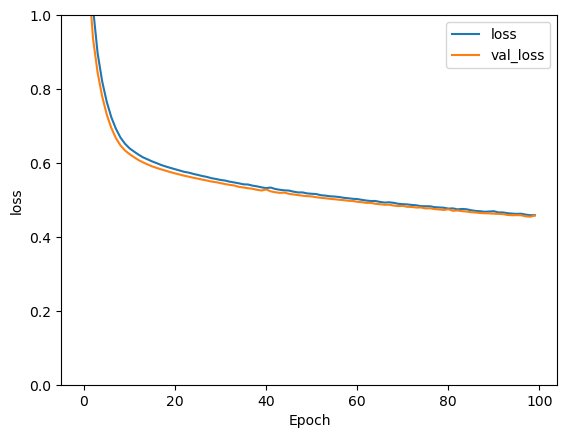

In [8]:

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.plot(model_hist.epoch, np.array(model_hist.history['loss']),
         label='loss')
plt.plot(model_hist.epoch, np.array(model_hist.history['val_loss']),
         label='val_loss')
plt.legend()
plt.ylim([0, 1])
plt.show()

***
**Wykres dokładności modelu**

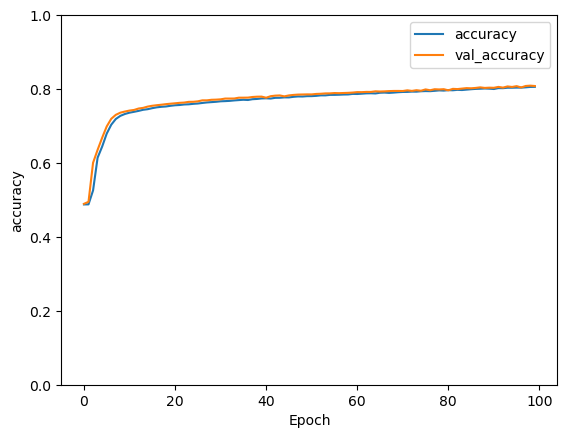

In [9]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.plot(model_hist.epoch, np.array(model_hist.history['accuracy']),
         label='accuracy')
plt.plot(model_hist.epoch, np.array(model_hist.history['val_accuracy']),
         label='val_accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()

***
**Zapis modeli**

In [10]:
model.save('ModelNN/ModelNN')

INFO:tensorflow:Assets written to: ModelNN/ModelNN\assets


# Podsumowanie

Uzyskaliśmy najwyższy *accuracy* z dotychczasowych modeli - około 80%. Jak na tak krótki czas treningu jest to wynik bardzo zadowalający, tym bardziej porównując go z innymi modelami. Warto zauważyć, że udało nam się uniknąć *overfittingu* - model działa tak samo dobrze na danych testowych co na treningowych.